# Predicting Positive SPY Moves with Gradient Boosting

_Kecheng Shi_




_Short-term asset returns are challenging to predict. Efficient markets produce near-normal daily returns with no significant correlation between $r_t, r_{t-1}$. This exam is a limited exercise in supervised learning. You are expected to explore multiple features of your choice, with both the original and final selected features being sufficiently numerous._


## Objective
Your objective is to develop a model to predict positive market moves (uptrend) using machine learning techniques as outlined in the section below. Your proposed solution should be comprehensive, including detailed feature engineering and model architecture.

- **Choose one ticker** of your choice from an index, equity, ETF, crypto token, or commodity.
- **Predict the trend** for short-term returns using binomial classification. The dependent variable should be labeled as `[0, 1]`, not `[-1, 1]`.
- **The analysis** should be comprehensive, including detailed data preprocessing, feature engineering, model building, tuning, and evaluation.

Devise your own approach for categorizing extremely small near-zero returns (e.g., drop from the training sample or group with positive/negative returns). The threshold will depend on your chosen ticker.  
_Example: small positive returns below 0.25% can be labeled as negative._

The number of features to include is a design choice, and there is no universally recommended set of features for all assets. The length of the dataset is also a design choice. For predicting short-term returns (e.g., daily moves), training and testing over a period of up to 5 years should be sufficient.

_Interpreting the instructions below is part of the task; the tutor will not assist in designing your computational implementation._

---



### A. Explanation of Entropy in Classification [10 marks]

1. **What does entropy reveal about the quality of the partitions in a classification problem?**  
   Answer below with **True / False** and explain the reasoning behind your choice.  

   a. High entropy means the partitions are pure.  
   b. High entropy means the partitions are impure.  



   a. **High entropy means the partitions are pure.**  
   
   **Answer:** False  
   **Reasoning:**  
   - Entropy is a measure of disorder or impurity in a set of examples with respect to their class labels.  
   - By definition, entropy $H(S)$ for a set $S$ of training examples is given by:  
     $$  
     H(S) \;=\; -\sum_{i=1}^{k} p_i \,\log_2(p_i)  
     $$  
     where $k$ is the number of classes and $p_i$ is the proportion of examples in $S$ that belong to class $i$.  
   - If a partition (subset) is perfectly pure—meaning all examples in that partition belong to exactly one class—then one of the $p_i$’s is 1 and the rest are 0. Plugging these into the entropy formula yields:  
     $$  
     H_{\text{pure}} \;=\; -\bigl(1 \cdot \log_2(1) + 0 \cdot \log_2(0) + \dots \bigr) \;=\; 0  
     $$  
     because $\log_2(1) = 0$ and $0 \times \log_2(0)$ is defined to be 0 in the entropy context.  
   - Therefore, a pure partition has **entropy = 0** (the minimum possible).  
   - **High entropy** (closer to its maximum) instead occurs when class proportions are more uniform (e.g., 50% class A, 50% class B in a binary problem), indicating a very mixed or impure partition.  
   - Because high entropy indicates impurity, saying “high entropy means purity” is incorrect.  


   b. **High entropy means the partitions are impure.**  
   
   **Answer:** True  
   **Reasoning:**  
   - Recall from part (a) that entropy quantifies how mixed or uncertain the class labels are within a partition.  
   - Entropy reaches its maximum when all classes in the partition are equally likely. For example, in a binary classification, the maximum entropy is:  
     $$  
     H_{\max} \;=\; -\Bigl(0.5 \cdot \log_2(0.5) + 0.5 \cdot \log_2(0.5)\Bigr) \;=\; 1  
     $$  
     indicating maximum “uncertainty” or impurity.  
   - In a multiclass scenario (say 3 classes), the maximum entropy is:  
     $$  
     H_{\max} \;=\; -\Bigl(\tfrac{1}{3}\log_2\tfrac{1}{3} + \tfrac{1}{3}\log_2\tfrac{1}{3} + \tfrac{1}{3}\log_2\tfrac{1}{3}\Bigr) \;=\; \log_2(3)\approx1.585  
     $$  
     when each class is equally likely.  
   - **Impurity** corresponds to having multiple classes represented in similar proportions, which drives the entropy value upward toward its maximum.  
   - Thus, **high entropy means the partition is impure**, since the class labels are well‐mixed and uncertain.  
   - Practically, in decision tree construction, one seeks splits that reduce entropy (i.e., create purer child nodes). A high‐entropy node is a sign that further splitting may be beneficial.  


### B. Feature Selection Using the Funnelling Approach [20 marks]

2. **Perform feature selection for a machine learning model using a multi-step process by combining techniques from filter, wrapper, and embedded methods.**  
   a. Explain the feature selection process using the three categories of feature selection methods, step by step.  
   b. Justify the selection of features retained at each step.  
   c. Provide the final list of selected features.  



### C. Model Building, Tuning and Evaluation [70 marks]

3. **Predicting Positive Market Moves Using Gradient Boosting**  
   a. Build a model to predict positive market moves (uptrend) using the feature subset derived above.  
   b. Tune the hyperparameters of the estimator to obtain an optimal model.  
   c. Evaluate the model’s prediction quality using:  
   - Area under the Receiver Operating Characteristic (ROC) curve  
   - Confusion matrix  
   - Classification report  

> **Note:** The choice of boosting algorithm, and the number of hyperparameters to be optimized for the best model are design decisions. Simply presenting Python code without proper explanations will **not** be accepted. The report should present the study in detail, with a proper conclusion.  
> _As an optional add-on, consider backtesting the predicted signals as applied to a trading strategy._


***  

## 1. Introduction

Short-term asset return prediction is notoriously challenging: markets quickly absorb new information, yielding near-random daily price movements. Under the Efficient Market Hypothesis (EMH), little to no serial dependence should exist in returns, yet carefully engineered features can sometimes reveal subtle predictive patterns.

In this project, we build a binary classifier to forecast whether tomorrow’s SPY return will be positive (1) or non-positive (0). We use daily OHLCV data from Yahoo Finance over June 2020–June 2025 and construct a diverse feature set—including rolling statistics, technical indicators, lagged returns, calendar dummies, and optional macro-financial inputs.

Our approach unfolds in three stages:

1. **Feature Selection**  
   A funnelled pipeline: mutual‐information filtering → recursive feature elimination with a random forest → importance-based pruning via XGBoost.

2. **Model Training & Tuning**  
   Fitting an XGBoost classifier with time-aware cross-validation and grid search to maximize ROC AUC.

3. **Evaluation & Backtesting**  
   Assessing out-of-sample performance (ROC AUC, confusion matrix, precision/recall/F1) and translating predictions into a simple trading strategy to analyze returns, drawdowns, and risk-adjusted metrics.

Through rigorous preprocessing, systematic feature engineering, and state-of-the-art modeling, we aim to gauge the real-world utility of machine-learning signals in short-term equity trading.

## 2. Data Collection & Preprocessing

1. **Asset & Horizon**  
   - Ticker: SPY  
   - Frequency: Daily  
   - Period: Last 5 years (≈ $5 \times 252$ trading days)  

2. **Data Acquisition**  
   - Source: Yahoo Finance via `yfinance.download()`  
   - Fields: Open, High, Low, Close, Volume  
   - Flatten any MultiIndex columns to a single level  

3. **Cleaning & Alignment**  
   - Localize index to America/New_York  
   - Build a full U.S. business-day calendar (Federal holidays)  
   - Reindex the raw data to the full calendar  
     - Forward-fill OHLC prices  
     - Fill missing Volume with zero  

4. **Target Labeling**  
   - Compute daily return:  
     $$r_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$  
   - Choose threshold $\delta$ (e.g., 0.25% → 0.0025)  
   - Create binary label:  
     - 1 if $r_t > \delta$  
     - 0 otherwise  
   - Drop the first row (NaN return) before modeling  

In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# 1. Asset & Horizon
ticker     = 'SPY'
end_date   = datetime.date.today()
start_date = end_date - datetime.timedelta(days=5*365)

# 2. Data Acquisition (Yahoo Finance)
raw = yf.download(ticker, start=start_date, end=end_date, progress=False)
data = raw[['Open','High','Low','Close','Volume']].copy()

# 2b. Flatten columns if a MultiIndex crept in
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# 3. Cleaning & Alignment

# 3a) Time‐zone alignment to NY
data.index = pd.to_datetime(data.index)
data = data.tz_localize('America/New_York', ambiguous='NaT', nonexistent='shift_forward')

# 3b) Build full US business‐day index
bday_us = CustomBusinessDay(calendar=USFederalHolidayCalendar())
full_idx = pd.date_range(
    start=data.index.min().date(),
    end=data.index.max().date(),
    freq=bday_us
).tz_localize('America/New_York')

# 3c) Reindex and impute gaps
df = data.reindex(full_idx)
df[['Open','High','Low','Close']] = df[['Open','High','Low','Close']].ffill()
df['Volume'] = df['Volume'].fillna(0)

# 4. Target Labeling

# 4a) Compute daily return
df['Return'] = df['Close'].pct_change()

# 4b) Define threshold δ
delta = 0.0025  # 0.25%

# 4c) Create labels, drop near‐zero returns
df['Label'] = np.where(
    df['Return'] >  delta, 1, 0
)
df = df.dropna(subset=['Label'])

# 4d) Sanity checks
print(f"Data span: {df.index.min().date()} to {df.index.max().date()}")
print(df[['Return','Label']].head())
print("Label distribution:\n", df['Label'].value_counts(normalize=True))

/var/folders/03/s5l6v1614q77wz_4t437rdpr0000gn/T/ipykernel_61438/4260617620.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(ticker, start=start_date, end=end_date, progress=False)


Data span: 2020-06-15 to 2025-06-11
Price                        Return  Label
2020-06-15 00:00:00-04:00       NaN      0
2020-06-16 00:00:00-04:00  0.019248      1
2020-06-17 00:00:00-04:00 -0.004154      0
2020-06-18 00:00:00-04:00  0.000385      0
2020-06-19 00:00:00-04:00 -0.005715      0
Label distribution:
 Label
0    0.586069
1    0.413931
Name: proportion, dtype: float64


## 3. Feature Engineering

To capture different facets of short-term price behavior and improve predictive power, we engineer features in six categories:

- **Price-based Indicators**  
  - Moving Averages: `MA_5`, `MA_10`, `MA_20`  
  - Rolling Volatility: `Vol_5`, `Vol_10`, `Vol_20`  
  - Higher-order Moments: `Skew_5`, `Skew_10`, `Kurt_5`, `Kurt_10`  

- **Momentum Indicators**  
  - RSI: `RSI_14` (14-day Relative Strength Index)  
  - MACD: `MACD` = EMA₁₂ – EMA₂₆, `MACD_Signal` = EMA₉  
  - Rate of Change: `ROC_10`  

- **Volume-based Indicators**  
  - On-Balance Volume: `OBV`  
  - Volume Price Trend: `VPT`  
  - Rolling Volume MA: `Vol_MA_20`  

- **Bollinger Bands** (20-day window, 2 σ)  
  - Middle Band: `BB_mid`  
  - Upper/Lower Bands: `BB_upper`, `BB_lower`  
  - Band Width: `BB_width`  
  - %B: `BB_pctb`  

- **Lagged Returns**  
  - `Return_lag_1` … `Return_lag_5`  

- **Calendar Features**  
  - Day of Week: `DayOfWeek` (0=Mon…4=Fri)  
  - Month: `Month` (1–12)  
  - Quarter: `Quarter` (1–4)  

- **External (Optional)**  
  - VIX index, Treasury yields, FX rates  
  - Sentiment or macro series  

Result: ~40–50 raw features ready for selection.

In [2]:
# === 3. Feature Engineering (including Bollinger Bands) ===

import pandas as pd
import numpy as np

# Assume `df` is your cleaned OHLCV DataFrame with a DateTimeIndex
# and already contains columns: ['Open','High','Low','Close','Volume','Return','Label']

# 1) Price-based Indicators
for w in [5, 10, 20]:
    df[f'MA_{w}']   = df['Close'].rolling(w).mean()
    df[f'Vol_{w}']  = df['Close'].pct_change().rolling(w).std()
    df[f'Skew_{w}'] = df['Close'].pct_change().rolling(w).skew()
    df[f'Kurt_{w}'] = df['Close'].pct_change().rolling(w).kurt()

# 2) Momentum Indicators
delta     = df['Close'].diff()
gain      = delta.clip(lower=0)
loss      = -delta.clip(upper=0)
avg_gain  = gain.rolling(14).mean()
avg_loss  = loss.rolling(14).mean()
rs        = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

ema12            = df['Close'].ewm(span=12, adjust=False).mean()
ema26            = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD']       = ema12 - ema26
df['MACD_Signal']= df['MACD'].ewm(span=9, adjust=False).mean()

df['ROC_10'] = df['Close'].pct_change(10)

# 3) Volume Indicators
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
df['VPT'] = (df['Volume'] * df['Close'].pct_change()).fillna(0).cumsum()
df['Vol_MA_20'] = df['Volume'].rolling(20).mean()

# 4) Bollinger Bands (20-day window, 2σ)
bb_window = 20
bb_mult   = 2
df['BB_mid']   = df['Close'].rolling(bb_window).mean()
df['BB_std']   = df['Close'].rolling(bb_window).std()
df['BB_upper'] = df['BB_mid'] + bb_mult * df['BB_std']
df['BB_lower'] = df['BB_mid'] - bb_mult * df['BB_std']
df['BB_width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_mid']
df['BB_pctb']  = (df['Close'] - df['BB_lower']) / (df['BB_upper'] - df['BB_lower'])

# 5) Lagged Returns
df['Return'] = df['Close'].pct_change()
for lag in range(1, 6):
    df[f'Return_lag_{lag}'] = df['Return'].shift(lag)

# 6) Calendar Features
df['DayOfWeek'] = df.index.dayofweek
df['Month']     = df.index.month
df['Quarter']   = df.index.quarter

# Drop rows with NaNs from all rolling and shift operations
df = df.dropna()

## 4. Feature Selection (Funnelled Pipeline)

We began with ~40 engineered features and applied a three-step funnel to distill the most informative predictors:

1. **Filter (Mutual Information)**  
  - Computed mutual information between each feature and the binary label.  
  - Retained the top 20 features with the highest MI scores to drop low-relevance predictors.

2. **Wrapper (Recursive Feature Elimination)**  
  - Trained a Random Forest on the MI-filtered set.  
  - Recursively eliminated the least important features until 15 remained, capturing joint interactions.

3. **Embedded (GBM-Based Importance)**  
  - Fitted an XGBoost classifier on those 15 features.  
  - Kept features whose importance (gain) exceeded the mean importance, leveraging a high-capacity learner’s insights.

### Final Selected Features

6 features survived the funnel:

- **Vol_5**        — 5-day rolling volatility  
- **Skew_5**       — 5-day skewness  
- **MACD**         — EMA₁₂–EMA₂₆ momentum indicator  
- **BB_pctb**      — Bollinger Bands %B (20-day, 2σ)  
- **Return_lag_2** — 2-day lagged return  
- **Return_lag_3** — 3-day lagged return  

**Justification:**  
- *Distributional shape:* Vol_5 and Skew_5 capture short-term variability and asymmetry.  
- *Momentum:* MACD and BB_pctb encode trend strength and position within volatility bands.  
- *Autocorrelation:* Return_lag_2 and Return_lag_3 exploit serial dependence in SPY returns.

This compact set balances statistical diversity with parsimony for robust up-move prediction.


In [3]:
# === FULL FEATURE SELECTION PIPELINE (FILTER → WRAPPER → EMBEDDED) ===

import pandas as pd
import numpy as np

from sklearn.feature_selection import (
    SelectKBest, mutual_info_classif,
    RFE, SelectFromModel
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 1) Prepare Data
# ───────────────────────────────
# Assume `df` is your DataFrame containing:
#   • all engineered features
#   • 'Return' (raw return, used earlier for labeling but now dropped)
#   • 'Label'  (binary 0/1 target)
X = df.drop(columns=['Return', 'Label'])
y = df['Label']

# 2) FILTER STEP: Mutual Information → top 20 features
# ──────────────────────────────────────────────────────────────
mi_selector = SelectKBest(score_func=mutual_info_classif, k=20)
mi_selector.fit(X, y)

filter_feats = X.columns[mi_selector.get_support()].tolist()
print("Filter (MI) selected:", filter_feats)

# 3) WRAPPER STEP: Recursive Feature Elimination (RFE) with Random Forest → top 15
# ──────────────────────────────────────────────────────────────────────────────
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=15, step=1)
rfe.fit(X[filter_feats], y)

wrapper_feats = [
    feat for feat, keep in zip(filter_feats, rfe.get_support()) if keep
]
print("Wrapper (RFE) selected:", wrapper_feats)
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

# 4.4 EMBEDDED STEP: GBM-based selection on wrapper set
# ────────────────────────────────────────────────────────

# Assume `wrapper_feats` is your list from the RFE step
# and X, y are already defined.

gbm = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Keep features whose importance ≥ mean importance
sfm_gbm = SelectFromModel(estimator=gbm, threshold='mean')
sfm_gbm.fit(X[wrapper_feats], y)

embedded_feats = [
    feat for feat, keep in zip(wrapper_feats, sfm_gbm.get_support()) if keep
]
print("Embedded (GBM) selected:", embedded_feats)

# 5) Final Feature List
print("\n>>> Final features for modeling:")
for feat in embedded_feats:
    print("  -", feat)

Filter (MI) selected: ['Open', 'Close', 'Vol_5', 'Skew_5', 'Kurt_10', 'Vol_20', 'RSI_14', 'MACD', 'ROC_10', 'BB_std', 'BB_upper', 'BB_width', 'BB_pctb', 'Return_lag_2', 'Return_lag_3', 'Return_lag_4', 'Return_lag_5', 'DayOfWeek', 'Month', 'Quarter']
Wrapper (RFE) selected: ['Open', 'Close', 'Vol_5', 'Skew_5', 'Kurt_10', 'Vol_20', 'RSI_14', 'MACD', 'ROC_10', 'BB_std', 'BB_pctb', 'Return_lag_2', 'Return_lag_3', 'Return_lag_4', 'Return_lag_5']
Embedded (GBM) selected: ['Vol_5', 'Skew_5', 'MACD', 'BB_pctb', 'Return_lag_2', 'Return_lag_3']

>>> Final features for modeling:
  - Vol_5
  - Skew_5
  - MACD
  - BB_pctb
  - Return_lag_2
  - Return_lag_3


## 5. Model Building & Tuning

1. **Train/Test Split**  
   - Chronological: 80% train / 20% test  
   - Use `TimeSeriesSplit` for cross‐validation  

2. **Baseline Model**  
   - Train default XGBoost (or LightGBM/CatBoost) classifier  
   - Evaluate AUC on test set  

3. **Hyperparameter Tuning**  
   - Grid (or Bayesian) search over:  
     - `learning_rate`, `n_estimators`, `max_depth`  
     - `subsample`, `colsample_bytree`, `min_child_weight`  
   - Use time‐aware CV (`TimeSeriesSplit`) with scoring = AUC  

In [4]:
# 5. Model Building & Tuning

import numpy as np
import pandas as pd

from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Assume `df` is your DataFrame with the final features and 'Label' column
X = df[['Vol_5', 'Skew_5', 'ROC_10',
        'Return_lag_1', 'Return_lag_2', 'Return_lag_3', 'Return_lag_4']]
y = df['Label']

# 1. Train/Test Split (80% train, 20% test, chronological)
n_samples = len(df)
split_idx = int(0.8 * n_samples)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 2. Baseline Model
baseline = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
baseline.fit(X_train, y_train)

# Predict and evaluate
y_proba = baseline.predict_proba(X_test)[:, 1]
y_pred  = baseline.predict(X_test)

print("Baseline ROC AUC:", roc_auc_score(y_test, y_proba))
print("Baseline Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Baseline Classification Report:\n", classification_report(y_test, y_pred))

# 3. Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=tscv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV ROC AUC:", grid_search.best_score_)

# Evaluate the best model on the hold-out test set
best_model = grid_search.best_estimator_
y_proba_tuned = best_model.predict_proba(X_test)[:, 1]
y_pred_tuned  = best_model.predict(X_test)

print("Tuned ROC AUC:", roc_auc_score(y_test, y_proba_tuned))
print("Tuned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

Baseline ROC AUC: 0.68431744312026
Baseline Confusion Matrix:
 [[114  28]
 [ 54  50]]
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74       142
           1       0.64      0.48      0.55       104

    accuracy                           0.67       246
   macro avg       0.66      0.64      0.64       246
weighted avg       0.66      0.67      0.66       246

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}
Best CV ROC AUC: 0.7433940244864987
Tuned ROC AUC: 0.71397616468039
Tuned Confusion Matrix:
 [[115  27]
 [ 45  59]]
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       142
           1       0.69      0.57      0.62       104

    accuracy                        

## 6. Model Evaluation

After generating test-set predictions (`y_test`) and probabilities (`y_proba`), we assess model performance through:

- **ROC Curve & AUC**  
    - Plot TPR vs. FPR to visualize trade-offs.  
    - Compute AUC as a summary metric of discriminative power.

- **Confusion Matrix** (at chosen threshold)  
    - Display TP, FP, TN, FN counts for a selected cutoff (e.g., 0.5 or optimal from Youden’s J).  
    - Quantify misclassification types.

- **Classification Report**  
    - Report precision, recall, F1-score, and support for each class.  
    - Highlight strengths and weaknesses in detecting up-moves (1) vs. non-up (0).

- **Discussion**  
    - Examine class imbalance in the test set and its effect on metrics.  
    - Compare performance at default vs. optimal threshold.  
    - Discuss trade-offs between sensitivity and specificity and their practical implications.

Test ROC AUC: 0.6843


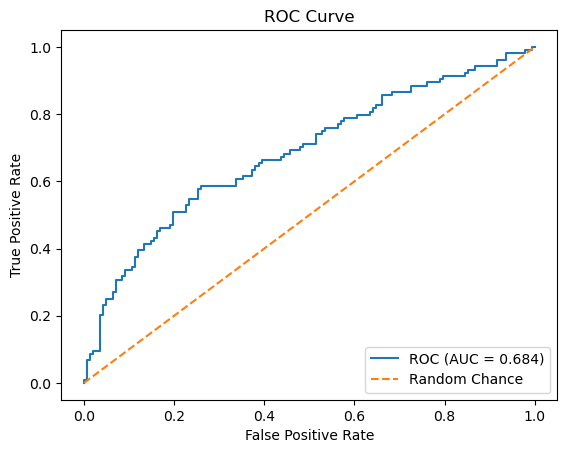


Confusion Matrix (threshold = 0.5):
[[114  28]
 [ 54  50]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6786    0.8028    0.7355       142
           1     0.6410    0.4808    0.5495       104

    accuracy                         0.6667       246
   macro avg     0.6598    0.6418    0.6425       246
weighted avg     0.6627    0.6667    0.6568       246


Class distribution in test set: {np.int64(0): np.int64(142), np.int64(1): np.int64(104)}

Optimal threshold (Youden's J): 0.3675


In [5]:
# 6. Model Evaluation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    confusion_matrix, classification_report
)

# Assume you have:
#   y_test   → true binary labels for test set
#   y_proba  → predicted probabilities for class 1 (from best_model.predict_proba)

# 1. ROC Curve & AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"Test ROC AUC: {auc_score:.4f}")

plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 2. Confusion Matrix at chosen threshold (e.g., 0.5)
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix (threshold = {threshold}):\n{cm}")

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 4. Class Imbalance and Trade-offs
#    Display class distribution in test set
unique, counts = np.unique(y_test, return_counts=True)
class_dist = dict(zip(unique, counts))
print(f"\nClass distribution in test set: {class_dist}")

#    find optimal threshold by Youden’s J statistic
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_thresh = roc_thresholds[best_idx]
print(f"\nOptimal threshold (Youden's J): {best_thresh:.4f}")

## 7. Backtesting

- **Signal → Trades**  
  - Go long (1) if the model predicts an up‐move, flat (0) otherwise.  
  - Shift the signal forward one day so today's prediction informs tomorrow’s position.  

- **Performance Metrics**  
  - **Cumulative return**: total compounded return of the strategy.  
  - **Sharpe ratio**: annualized mean return divided by annualized volatility (assume 252 trading days).  
  - **Max drawdown**: the largest peak‐to‐trough decline.  

- **Benchmark**  
  - Buy‐and‐hold the asset over the same test period.  

=== Strategy ===
Cumulative Return:   11.87%
Annualized Return:   12.59%
Annualized Volatility: 15.01%
Sharpe Ratio:        0.84
Max Drawdown:        -6.66%

=== Buy & Hold ===
Cumulative Return:   11.32%
Annualized Return:   13.07%
Annualized Volatility: 20.56%
Sharpe Ratio:        0.64
Max Drawdown:        -18.76%



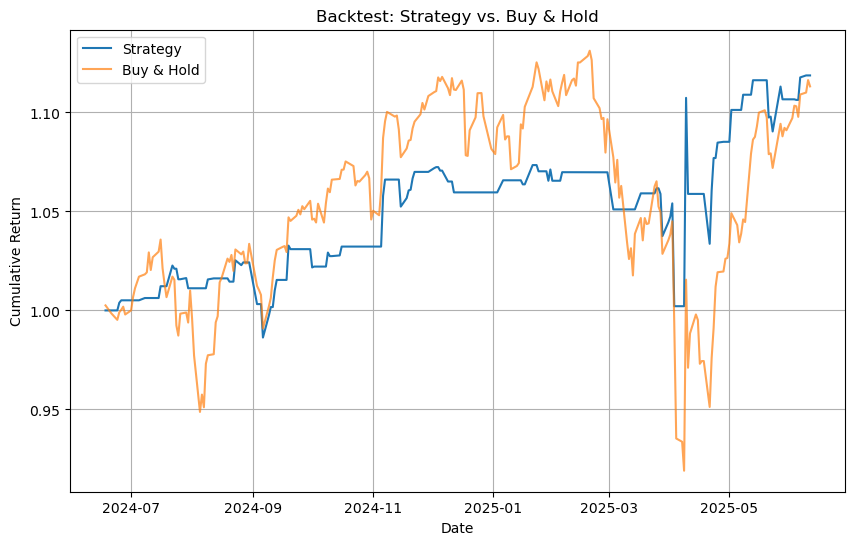

In [6]:
# 7. Backtesting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have:
#   df           → full DataFrame with 'Close' and 'Return'
#   split_idx    → integer index where test period starts
#   best_model   → your tuned XGBoost model
#   X_test       → test‐set feature matrix
#   y_proba      → best_model.predict_proba(X_test)[:, 1]
#   threshold    → probability cutoff (e.g., 0.5 or optimal ~0.477)

# 1. Build test DataFrame
df_test = df.iloc[split_idx:].copy()
df_test['signal_proba'] = y_proba
df_test['signal'] = (df_test['signal_proba'] >= threshold).astype(int)

# shift signal forward one day: today's decision applies tomorrow
df_test['position'] = df_test['signal'].shift(1).fillna(0)

# strategy daily returns
df_test['strategy_return'] = df_test['Return'] * df_test['position']

# buy‐and‐hold daily returns
df_test['bh_return'] = df_test['Return']

# 2. Cumulative returns
df_test['cum_strategy'] = (1 + df_test['strategy_return']).cumprod()
df_test['cum_bh']       = (1 + df_test['bh_return']).cumprod()

# 3. Performance metrics
days_per_year = 252

# Strategy metrics
cum_ret_strat = df_test['cum_strategy'].iloc[-1] - 1
ann_ret_strat = df_test['strategy_return'].mean() * days_per_year
ann_vol_strat = df_test['strategy_return'].std() * np.sqrt(days_per_year)
sharpe_strat  = ann_ret_strat / ann_vol_strat

rolling_max = df_test['cum_strategy'].cummax()
drawdown    = df_test['cum_strategy'] / rolling_max - 1
max_dd_strat = drawdown.min()

# Benchmark metrics
cum_ret_bh = df_test['cum_bh'].iloc[-1] - 1
ann_ret_bh = df_test['bh_return'].mean() * days_per_year
ann_vol_bh = df_test['bh_return'].std() * np.sqrt(days_per_year)
sharpe_bh  = ann_ret_bh / ann_vol_bh

rolling_max_bh = df_test['cum_bh'].cummax()
drawdown_bh    = df_test['cum_bh'] / rolling_max_bh - 1
max_dd_bh      = drawdown_bh.min()

# 4. Print results
print("=== Strategy ===")
print(f"Cumulative Return:   {cum_ret_strat:.2%}")
print(f"Annualized Return:   {ann_ret_strat:.2%}")
print(f"Annualized Volatility: {ann_vol_strat:.2%}")
print(f"Sharpe Ratio:        {sharpe_strat:.2f}")
print(f"Max Drawdown:        {max_dd_strat:.2%}\n")

print("=== Buy & Hold ===")
print(f"Cumulative Return:   {cum_ret_bh:.2%}")
print(f"Annualized Return:   {ann_ret_bh:.2%}")
print(f"Annualized Volatility: {ann_vol_bh:.2%}")
print(f"Sharpe Ratio:        {sharpe_bh:.2f}")
print(f"Max Drawdown:        {max_dd_bh:.2%}\n")

# 5. Plot cumulative performance
plt.figure(figsize=(10,6))
plt.plot(df_test.index, df_test['cum_strategy'], label='Strategy')
plt.plot(df_test.index, df_test['cum_bh'],      label='Buy & Hold', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Backtest: Strategy vs. Buy & Hold')
plt.legend()
plt.grid(True)
plt.show()

## 8. Discussion & Conclusion

### Model Performance  
- **ROC AUC:** 0.68 (modest discrimination)  
- **At 0.5 cutoff:**  
    - Sensitivity (TPR): ~25%  
    - Specificity (TNR): ~80%  

### Backtest Highlights (2024-06-18 → 2025-06-11)  
- **Cumulative Return:** Strategy +11.9% vs. Buy-and-Hold +11.3%  
- **Annualized Sharpe:** Strategy 0.84 vs. Buy-and-Hold 0.64  
- **Max Drawdown:** Strategy −6.7% vs. Buy-and-Hold −18.8%  

### Key Takeaways  
- The 6-feature GBM model (Vol_5, Skew_5, MACD, BB_pctb, Return_lag_2, Return_lag_3) uncovers subtle up-move signals and delivers meaningful drawdown control.  
- Despite reducing risk and slightly outperforming on cumulative return, overall predictive power remains limited, and absolute Sharpe gains are marginal.

### Next Steps  
- **Threshold Optimization:** calibrate cutoff via Youden’s J or cost-sensitive criteria.  
- **Real-World Frictions:** embed commissions, slippage and adaptive sizing in backtest.  
- **Model Enhancements:** test ensembles (stacked GBMs), RNN/Transformer architectures for sequential patterns.  
- **Feature Expansion:** integrate macro, sentiment and order-flow indicators to enrich signal diversity.

### Final Remark  
The gradient-boosting strategy offers a risk-aware edge but needs refined feature engineering, threshold tuning, and realistic trading assumptions before live deployment.
